In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [145]:
df=pd.read_csv('GOOG.csv')

In [146]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [147]:
df.isnull().sum() #checking for any null values

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [148]:
print("date datatype - ",type(df['date'][0]))

date datatype -  <class 'str'>


In [149]:
print(df['date'][0])

2016-06-14 00:00:00+00:00


In [150]:
df['date']=pd.to_datetime(df.date) #changing str to datetime

In [151]:
df['date']=df['date'].dt.date #removing time from date

In [152]:
print(df['date'][0])

2016-06-14


In [153]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [154]:
df=df.drop(['symbol'],axis=1)
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [155]:
# df=df[-255:] #taking only one year stock
# df.shape

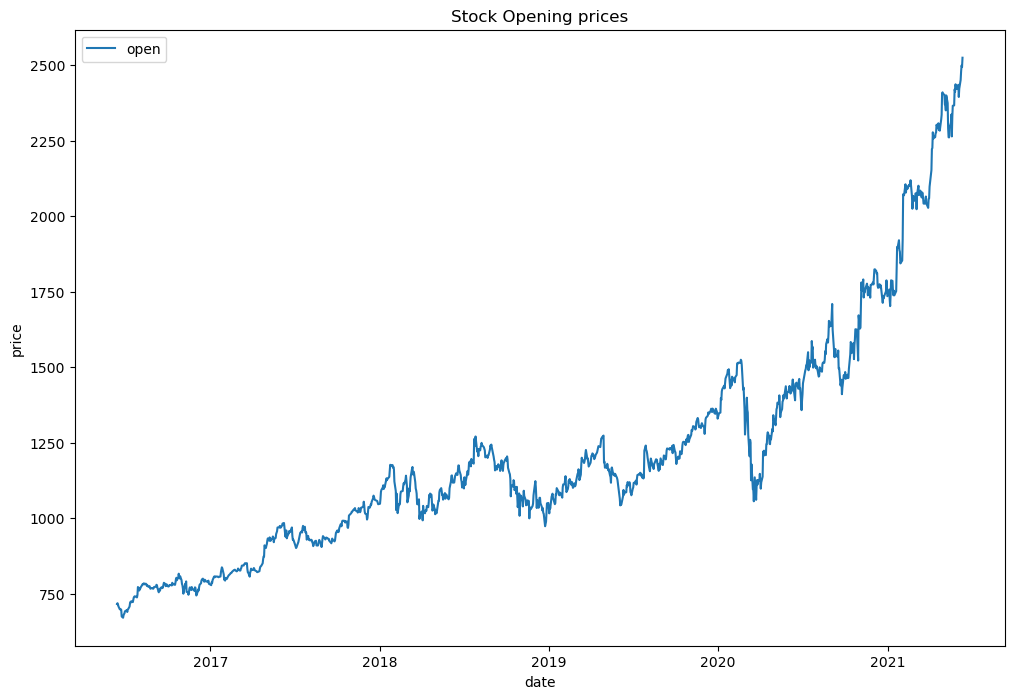

In [156]:
plt.plot(df.date,df.open,label='open')

plt.title('Stock Opening prices')
plt.xlabel('date')
plt.ylabel('price')

plt.legend()
plt.show()

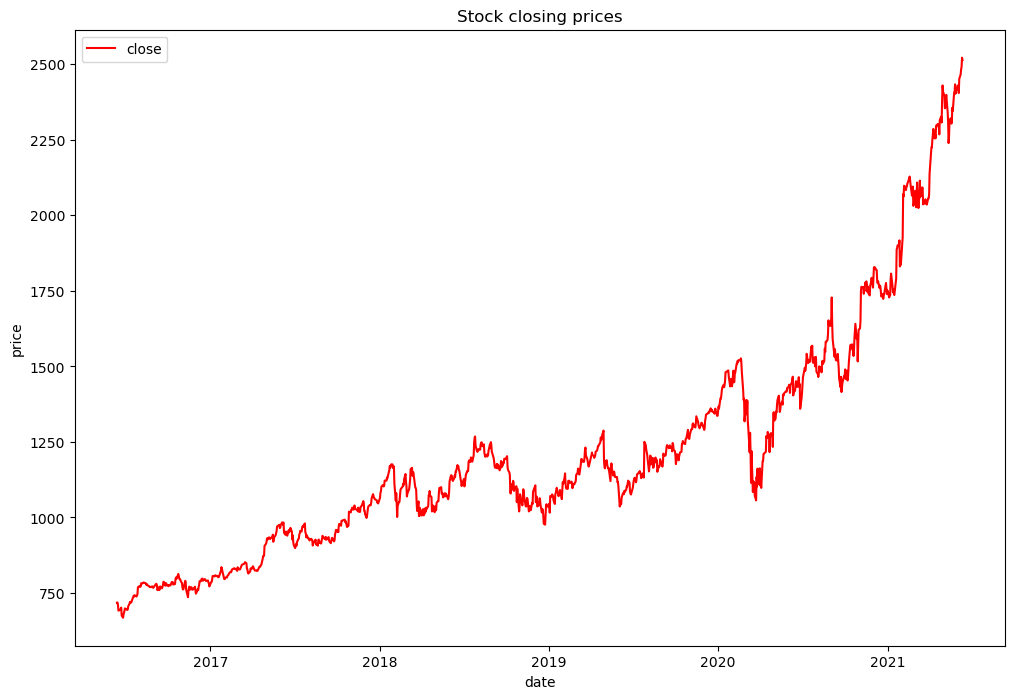

In [157]:
plt.plot(df.date,df.close,label='close',color='red')

plt.title('Stock closing prices')
plt.xlabel('date')
plt.ylabel('price')

plt.legend()
plt.show()

In [177]:
# separating required data for model
data=df[['date','close']]
data.head()

,date,close
0,2016-06-14,718.27
1,2016-06-15,718.92
2,2016-06-16,710.36
3,2016-06-17,691.72
4,2016-06-20,693.71


In [178]:
# Preprocessing data
# scaler=MinMaxScaler(feature_range=(0,1))
# scaled_close=scaler.fit_transform(data)
close=data['close']

In [179]:
close=pd.DataFrame(close)

In [180]:
type(close)

pandas.core.frame.DataFrame

In [181]:
data.shape

(1258, 2)

In [182]:
data.describe()

,close
count,1258.000000
mean,1216.317067
std,383.333358
min,668.260000
25%,960.802500
50%,1132.460000
75%,1360.595000
max,2521.600000


In [226]:
prediction_days=50

In [227]:
close['predict']=close['close'].shift(-prediction_days)

In [228]:
close.head()

,close,predict
0,718.27,769.64
1,718.92,769.41
2,710.36,769.54
3,691.72,772.15
4,693.71,769.09


In [229]:
close.tail()

,close,predict
1253,2466.09,NaN
1254,2482.85,NaN
1255,2491.40,NaN
1256,2521.60,NaN
1257,2513.93,NaN


In [230]:
x_train=[]
y_train=[]

In [231]:
#preparing dpendent and independent values
for i in range(len(close)-prediction_days):
    x_train.append(close['close'][i:i+prediction_days])
    y_train.append(close['predict'][i+prediction_days])

In [232]:
x_train[0] #first 30 days stock

0     718.27
1     718.92
2     710.36
3     691.72
4     693.71
5     695.94
6     697.46
7     701.87
8     675.22
9     668.26
10    680.04
11    684.11
12    692.10
13    699.21
14    694.49
15    697.77
16    695.36
17    705.63
18    715.09
19    720.64
20    716.98
21    720.95
22    719.85
23    733.78
24    736.96
25    741.19
26    738.63
27    742.74
28    739.77
29    738.42
30    741.77
31    745.91
32    768.79
33    772.88
34    771.07
35    773.18
36    771.61
37    782.22
38    781.76
39    784.26
40    784.68
41    784.85
42    783.22
43    782.44
44    777.14
45    779.91
46    777.50
47    775.42
48    772.15
49    772.08
Name: close, dtype: float64

In [233]:
y_train[0] # 28th day stock

762.13

In [234]:
#spliting data in train and test
train_len=int(len(y_train)*0.80)
X_train=x_train[:train_len]
Y_train=y_train[:train_len]
X_test=x_train[train_len:]
Y_test=y_train[train_len:]

In [235]:
X_train,Y_train,X_test,Y_test=np.array(X_train),np.array(Y_train),np.array(X_test),np.array(Y_test)

In [236]:
type(X_train)

numpy.ndarray

In [237]:
len(X_train)

966

In [238]:
len(X_test)

242

In [240]:
X_train,X_test=X_train.reshape(len(X_train),prediction_days),X_test.reshape(len(X_test),prediction_days)

In [241]:
# print(len(X_train))
# print(len(X_test))

In [242]:
print(len(Y_train))
print(len(Y_test))

966
242


In [243]:
#using linear regression 
model=LinearRegression()

In [244]:
model.fit(X_train,Y_train)

LinearRegression()

In [245]:
pred=model.predict(X_test)

In [248]:
l=X_test.shape[0]
draw=draw.iloc[-l:]
draw['predict']=pred
draw.head()

C:\Users\aswal\AppData\Local\Temp\ipykernel_3200\1899909816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draw['predict']=pred


,close,predict
1016,1359.90,1368.285614
1017,1394.97,1354.661070
1018,1413.61,1365.875955
1019,1438.04,1368.485942
1020,1464.70,1397.956572


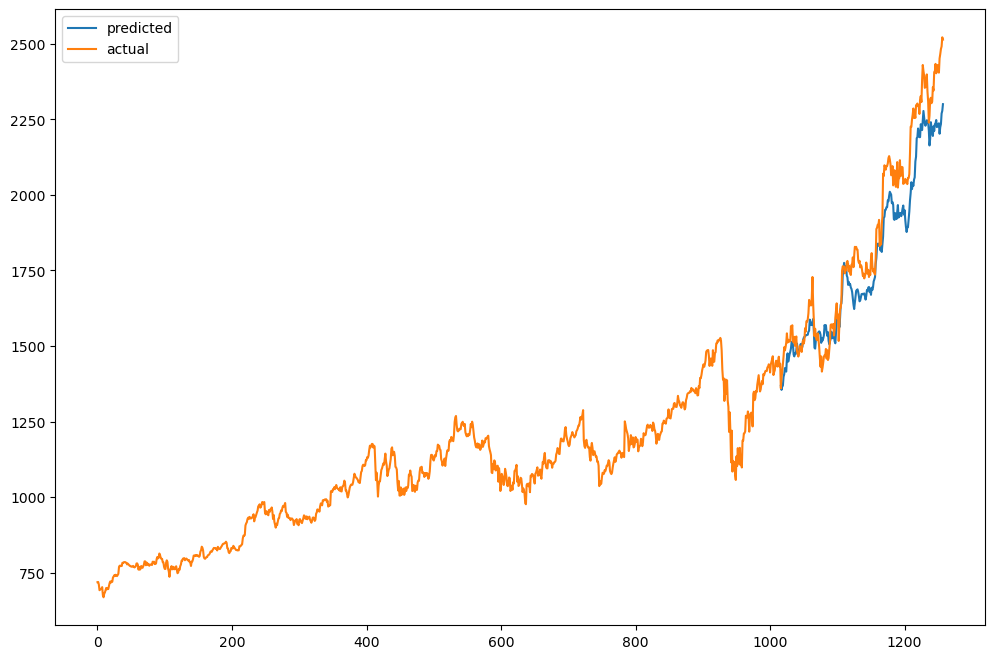

In [249]:
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(draw['predict'],label="predicted")
plt.plot(close['close'],label="actual")
plt.legend(loc="upper left")
plt.show()

In [250]:
#using DecisionTreeRegressor
model1=DecisionTreeRegressor()
model1.fit(X_train,Y_train)

DecisionTreeRegressor()

In [251]:
pred1=model.predict(X_test)
l=X_test.shape[0]
draw=draw.iloc[-l:]
draw['predict']=pred1
draw.head()

,close,predict
1016,1359.90,1368.285614
1017,1394.97,1354.661070
1018,1413.61,1365.875955
1019,1438.04,1368.485942
1020,1464.70,1397.956572


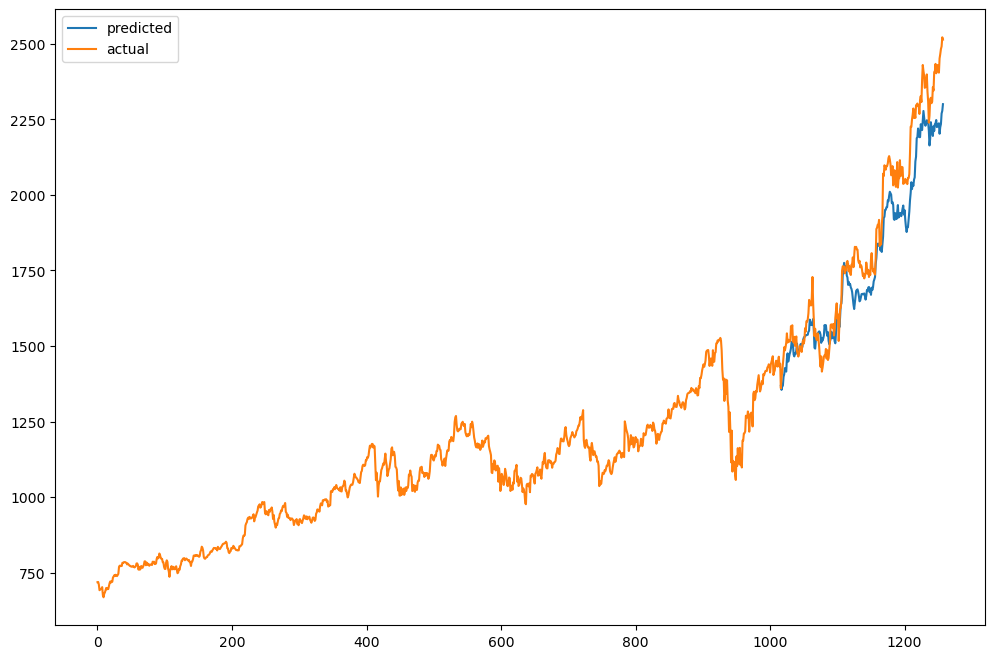

In [252]:
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(draw['predict'],label="predicted")
plt.plot(close['close'],label="actual")
plt.legend(loc="upper left")
plt.show()

In [253]:
from sklearn.svm import SVR
model2=SVR(kernel='linear')
model2.fit(X_train,Y_train)

SVR(kernel='linear')

In [254]:
pred2=model2.predict(X_test)
l=X_test.shape[0]
draw=draw.iloc[-l:]
draw['predict']=pred2
draw.head()

,close,predict
1016,1359.90,1439.865081
1017,1394.97,1361.883906
1018,1413.61,1374.705850
1019,1438.04,1311.129435
1020,1464.70,1437.073353


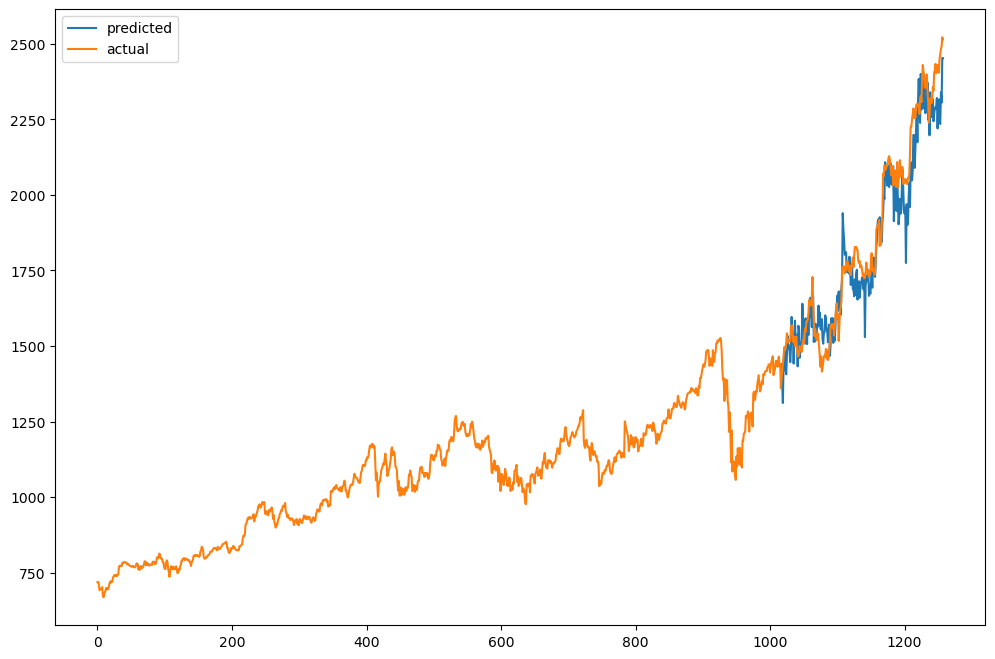

In [255]:
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(draw['predict'],label="predicted")
plt.plot(close['close'],label="actual")
plt.legend(loc="upper left")
plt.show()